In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatbot-symptom-description/symptom_Description.csv
/kaggle/input/chatbot-symptom-description/Symptom_severity.csv
/kaggle/input/chatbot-symptom-description/database.db
/kaggle/input/chatbot-symptom-description/symptom_precaution.csv
/kaggle/input/chatbot-symptom-description/dataset.csv
/kaggle/input/symptom-checker/Training.csv
/kaggle/input/symptom-checker/Testing.csv


In [2]:
pip install google_trans_new


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from google_trans_new import google_translator  
translator = google_translator() 

training = pd.read_csv('../input/symptom-checker/Training.csv')
testing= pd.read_csv('../input/symptom-checker/Testing.csv')
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']
y1= y


reduced_data = training.groupby(training['prognosis']).max()

#mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
testx    = testing[cols]
testy    = testing['prognosis']  
testy    = le.transform(testy)


clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
# print(clf.score(x_train,y_train))
# print ("cross result========")
scores = cross_val_score(clf, x_test, y_test, cv=3) # cv****
# print (scores)
print (scores.mean())

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

def readn(nstr):
    engine = pyttsx3.init()

    engine.setProperty('voice', "english+f5")
    engine.setProperty('rate', 130)

    engine.say(nstr)
    engine.runAndWait()
    engine.stop()


severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

symptoms_dict = {}

for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


def getDescription():
    global description_list
    with open('../input/chatbot-symptom-description/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)




def getSeverityDict():
    global severityDictionary
    with open('../input/chatbot-symptom-description/Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass


def getprecautionDict():
    global precautionDictionary
    with open('../input/chatbot-symptom-description/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)


def getInfo():
    # name=input("Name:")
    print("please Your Name \n\t\t\t\t\t\t")
    print("कृपया अपना नाम बताएं",end="->")
    name=input("")
    print("hello ",name)

def check_pattern(dis_list,inp):
    import re
    pred_list=[]
    ptr=0
    patt = "^" + inp + "$"
    regexp = re.compile(inp)
    for item in dis_list:

        print(f"comparing {inp} to {item}")##########
        if regexp.search(item):
            pred_list.append(item)
            #return 1,item
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return ptr,item
def sec_predict(symptoms_exp):
    df = pd.read_csv('../input/symptom-checker/Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {}

    for index, symptom in enumerate(X):
        symptoms_dict[symptom] = index

    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
        input_vector[[symptoms_dict[item]]] = 1


    return rf_clf.predict([input_vector])


def print_disease(node):
    #print(node)
    node = node[0]
    #print(len(node))
    val  = node.nonzero() 
    # print(val)
    disease = le.inverse_transform(val[0])
    return disease
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    # print(tree_)
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []


    # conf_inp=int()
    while True:

        print("Enter the symptom you are experiencing  \n\t\t\t\t\t\t")
        translate_text = translator.translate('Enter the symptom you are experiencing',lang_tgt='hi')  
        print(translate_text,end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            # print("Did you mean: ",cnf_dis,"?(yes/no) :",end="")
            # conf_inp = input("")
            # if(conf_inp=="yes"):
            #     break
        else:
            print("Enter valid symptom.")
            translate_text = translator.translate('Enter valid symptom.',lang_tgt='hi')
            print(translate_text)

    while True:
        try:
            #translate_text = translator.translate('Okay. From how many days ?',lang_tgt='hi')
            num_days=int(input("Okay. From how many days ? अच्छा । कितने दिनों से?  : "))
            #num_days=int(input("अच्छा । कितने दिनों से? :" )             
            break
        except:
            print("Enter number of days.")
            print("दिनों की संख्या दर्ज करें ")             
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            # print( "You may have " +  present_disease )
            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            # dis_list=list(symptoms_present)
            # if len(dis_list)!=0:
            #     print("symptoms present  " + str(list(symptoms_present)))
            # print("symptoms given "  +  str(list(symptoms_given)) )
            print("Are you experiencing any ")
            print("क्या आप कोई अनुभव कर रहे हैं")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ")
                        print("उचित उत्तर प्रदान करें I.E. (yes/no) :",end="") 
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])
                #translate_text = translator.translate(present_disease[0],lang_tgt='hi')
                #print(" शायद आपके पास    ",translate_text)
                #translate_text2 = translator.translate(print(description_list[present_disease[0]]),lang_tgt='hi')

                print(description_list[present_disease[0]])
                #print(translate_text2)

                # readn(f"You may have {present_disease[0]}")
                # readn(f"{description_list[present_disease[0]]}")

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            # print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)

            confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
            print("confidence level is " + str(confidence_level))

    recurse(0, 1)
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)



0.9772174893652817
please Your Name 
						
कृपया अपना नाम बताएं->

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

[Text(326.1038961038961, 215.53263157894736, 'X[55] <= 0.5\ngini = 0.976\nsamples = 3296\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 86, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 89, 74, 87\n80, 79, 79, 80, 76]'),
 Text(321.75584415584416, 211.7178947368421, 'X[93] <= 0.5\ngini = 0.975\nsamples = 3210\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 89, 74, 87\n80, 79, 79, 80, 76]'),
 Text(317.4077922077922, 207.90315789473684, 'X[79] <= 0.5\ngini = 0.974\nsamples = 3124\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 3, 74, 87\n80, 79, 79, 80, 76]'),
 Text(313.05974025974024, 204.0884210526316, 'X[105] <= 0.5\ngini = 0.974\nsamples = 3038\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82

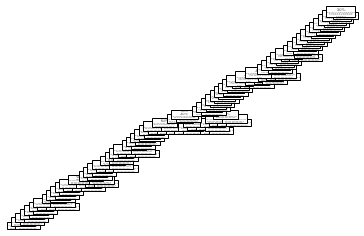

In [5]:
from sklearn import tree

tree.plot_tree(clf) 

In [6]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import graphviz 
dot_data = tree.export_graphviz(clf) 
graph = graphviz.Source(dot_data) 
graph.render("chatbot") 

'chatbot.pdf'

In [8]:
getInfo()
tree_to_code(clf,cols)

please Your Name 
						
कृपया अपना नाम बताएं->

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [9]:
pip install dtreeviz

     |████████████████████████████████| 60 kB 1.8 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66638 sha256=30a63feaf351af7766efea52e3cef60573228d2ea8c5613bb5e3930bd8a6834f
  Stored in directory: /root/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.8.0.post0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
autogluon-core 0.1.0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

ImportError: cannot import name 'run' from 'graphviz.backend' (/opt/conda/lib/python3.7/site-packages/graphviz/backend.py)

In [11]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'support_vectors_'

In [12]:
print(translate_text)

NameError: name 'translate_text' is not defined

In [13]:

pip install googletrans==3.1.0a0


     |████████████████████████████████| 55 kB 1.1 MB/s 
     |████████████████████████████████| 994 kB 3.4 MB/s 
     |████████████████████████████████| 42 kB 728 kB/s 
     |████████████████████████████████| 133 kB 6.0 MB/s 
     |████████████████████████████████| 65 kB 1.9 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=e21c482ca62cf982962e274a187adde7ad831634dc334d2767703f4be900102c
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.8.0.post0 requires grap

In [14]:
pip install google_trans_new


Note: you may need to restart the kernel to use updated packages.


In [15]:

from google_trans_new import google_translator  
translator = google_translator()  

print(translate_text)
#output: Hello china

NameError: name 'translate_text' is not defined

In [16]:
translate_text = translator.translate('You should take the consultation from doctor. You may have  Varicose veins or  (vertigo) Paroymsal  Positional VertigoA vein that has enlarged and twisted, often appearing as a bulging, blue blood vessel that is clearly visible through the skin. Varicose veins are most common in older adults, particularly women, and occur especially on the legs.Benign paroxysmal positional vertigo (BPPV) is one of the most common causes of vertigo — the sudden sensation that youre spinning or that the inside of your head is spinning. Benign paroxysmal positional vertigo causes brief episodes of mild to intense dizziness.Take following measures : 1 ) lie down flat and raise the leg high2 ) use oinments3 ) use vein compression4 ) dont stand still for long',lang_tgt='hi')

In [17]:
training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [18]:
cols[:-1]

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
       'inflammatory_nails', 'blister', 'red_sore_around_nose'],
      dtype='object', length=131)